In [ ]:
!pip -q install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatimakhawer","key":"faf7191af8254853159f2c499f1ea7af"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                        Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          13170        288  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets              Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000           6940        105  1.0              
rohitgrewal/airlines-flights-data                                  Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          20589        381  1.0

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadityasinghal/facial-expression-dataset")

print("Path to dataset files:", path)

100%|██████████| 60.7M/60.7M [00:00<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aadityasinghal/facial-expression-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Dropout, Flatten, MaxPooling2D

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


In [ ]:
import os

print(os.listdir("/kaggle/input/fer2013"))


['test', 'train']


In [ ]:
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

In [ ]:
#conversion for converting a folder struct into a csv
def load_dataset(directory):
  image_paths = []
  labels = []
  for label in os.listdir(directory):
    for filename in os.listdir(directory + '/' + label):
      image_path = os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)

    print(label,"completed")

  return image_paths, labels

In [ ]:
#convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


,image,label
0,/kaggle/input/fer2013/train/surprise/Training_...,surprise
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/sad/Training_37590...,sad
3,/kaggle/input/fer2013/train/sad/Training_33162...,sad
4,/kaggle/input/fer2013/train/surprise/Training_...,surprise


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test.head()

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


,image,label
0,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
1,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
2,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
3,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
4,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise


<Axes: xlabel='count', ylabel='label'>

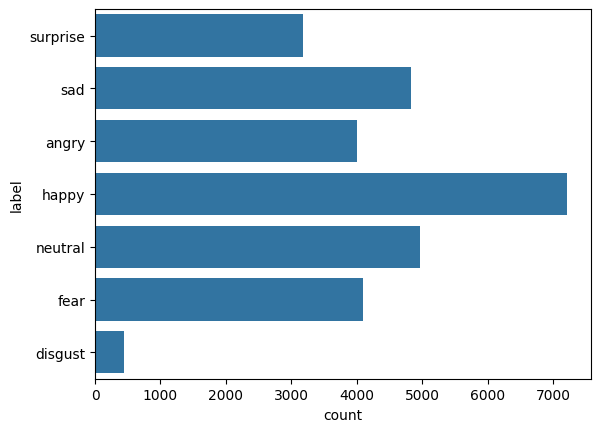

In [ ]:
#data analysis
sns.countplot(train['label'])

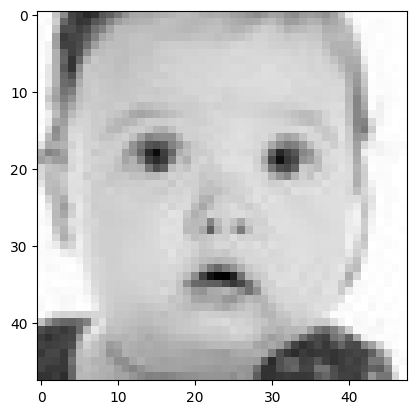

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

<Figure size 2500x2500 with 0 Axes>

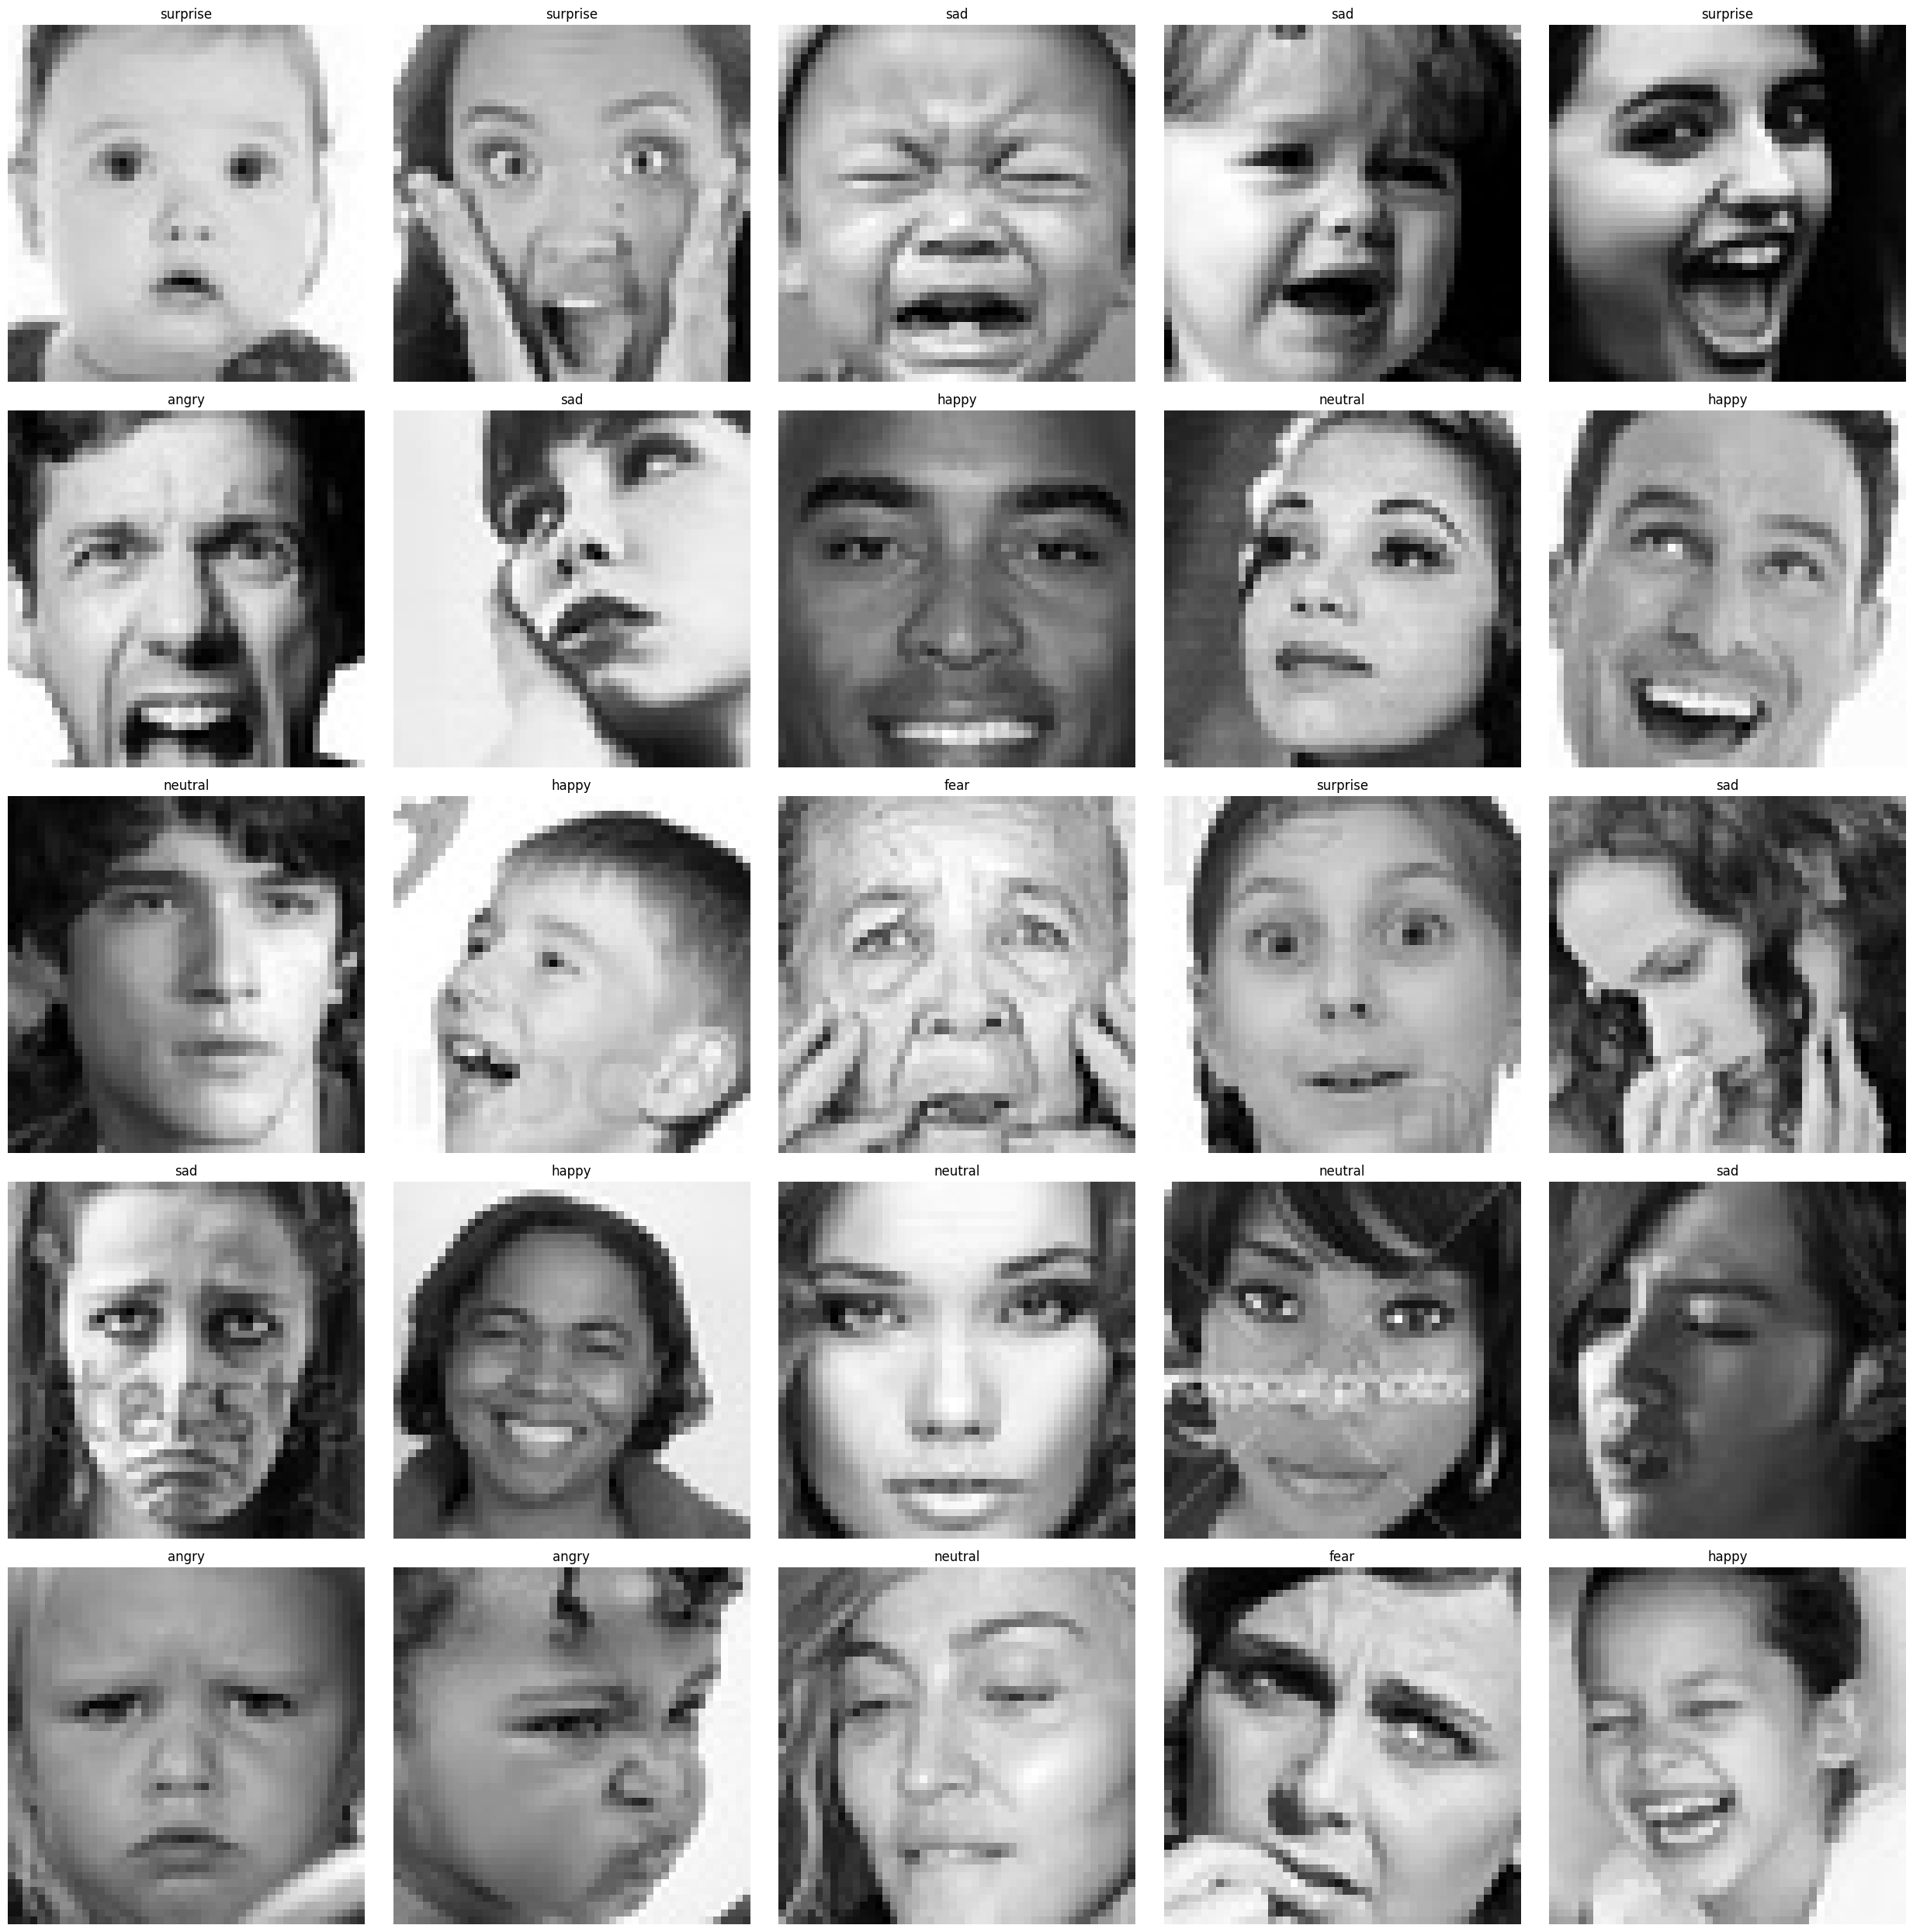

In [ ]:
#to display grid of images
plt.figure(figsize=(25,25))
files = train.iloc[0:25]

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
axes = axes.flatten() # Flatten the 5x5 grid of axes into a 1D array for easy iteration

for i, (index, file, label) in enumerate(files.itertuples()):
  img = Image.open(file) # Use PIL.Image.open to load the image
  img = np.array(img)
  axes[i].imshow(img, cmap='gray') # Display the image in the current subplot
  axes[i].set_title(label)
  axes[i].axis('off')

plt.tight_layout() # Adjust layout to prevent titles from overlapping
plt.show()

In [ ]:
from tqdm import tqdm

#feature extraction
def extract_features(images):
  features = []
  for image in tqdm(images):
    img = Image.open(image).convert('L') # Load as grayscale
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 48, 48, 1)
  return features

In [ ]:
train_features = extract_features(train['image'])


100%|██████████| 28709/28709 [02:44<00:00, 174.07it/s]


In [ ]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:42<00:00, 169.06it/s]


In [ ]:
#normalizing the image
x_train = train_features/255.0
x_test = test_features/255.0


In [ ]:
#convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.])

In [ ]:
#config
input = (48, 48, 1)
output_class = 7

In [ ]:
#model creation
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(output_class, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 122s 133ms/step - accuracy: 0.2438 - loss: 1.8287 - val_accuracy: 0.2526 - val_loss: 1.7679
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.2823 - loss: 1.7298 - val_accuracy: 0.3686 - val_loss: 1.5803
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 122ms/step - accuracy: 0.3793 - loss: 1.5700 - val_accuracy: 0.4441 - val_loss: 1.4387
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 123ms/step - accuracy: 0.4244 - loss: 1.4732 - val_accuracy: 0.4790 - val_loss: 1.3564
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 146s 128ms/step - accuracy: 0.4548 - loss: 1.4182 - val_accuracy: 0.4969 - val_loss: 1.3036
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 122ms/step - accuracy: 0.4707 - loss: 1.3748 - val_accuracy: 0.4950 - val_loss: 1.3054
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 161s 143ms/step - accuracy: 0.4822 - loss: 1.3466 - val_accuracy: 0.5231 - val_loss: 1.2528
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 125s 124ms/step - accuracy: 0.4945 -

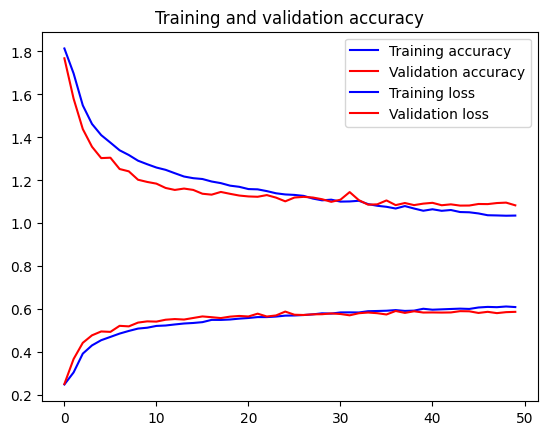

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

original output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
predicted output: ['happy']


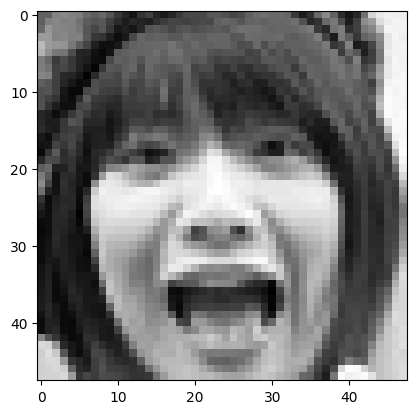

In [ ]:
#test with image data
import random
image_index = random.randint(0, len(test))
print("original output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediciton_label = le.inverse_transform(pred.argmax().reshape(-1,1))
print("predicted output:", prediciton_label)
plt.imshow(x_test[image_index].reshape(48,48), cmap = 'grey')